# COVID-19 Global Data Tracker

**Author:** Kaliphile Papiyana  
**Date:** 10-05-2025

## Introduction
This notebook analyzes global COVID-19 data from Our World in Data. We'll examine case trends, death rates, and vaccination progress across selected countries using Python's data analysis tools.

In [12]:
# Importting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Setting up visualization
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries imported successfully!")

SystemError: <class 'numpy.iinfo'> returned a result with an exception set

## Data Loading
We will begin by loading the dataset and performing initial exploration to understand its structure and contents.

In [ ]:
# Loading data
try:
    df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])
    display(Markdown(f"**Data loaded successfully!** \n\nShape: {df.shape} rows × {df.shape[1]} columns"))
    display(Markdown("\n **First look at the data:**"))
    display(df.head(2))
except Exception as e:
    print(f" Error loading data: {e}")

**Data loaded successfully!** 

Shape: (166326, 67) rows × 67 columns


 **First look at the data:**

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Data Preparation
We'll clean and prepare the data by:
- Selecting key countries of interest
- Handling missing values
- Calculating important metrics

In [ ]:
# Data cleaning
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Kenya', 'South Africa']

# Filter and clean data
analysis_df = df[df['location'].isin(countries)].copy()
analysis_df = analysis_df[['date', 'location', 'total_cases', 'new_cases', 
                          'total_deaths', 'new_deaths', 'people_vaccinated', 'population']]

# Calculate metrics
analysis_df['death_rate'] = analysis_df['total_deaths'] / analysis_df['total_cases']
analysis_df['cases_per_million'] = analysis_df['total_cases'] / (analysis_df['population'] / 1e6)

# Fill missing values
analysis_df.fillna({'total_cases': 0, 'new_cases': 0, 'total_deaths': 0, 'new_deaths': 0}, inplace=True)

display(Markdown("**Data cleaned successfully!**"))
display(Markdown("\n **Sample of processed data:**"))
display(analysis_df.sample(3))

**Data cleaned successfully!**


 **Sample of processed data:**

,date,location,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,population,death_rate,cases_per_million
21891,2021-09-30,Brazil,21432362.0,21951.0,597032.0,608.0,151420924.0,2.139934e+08,0.027857,100154.293981
70121,2021-04-17,India,14788003.0,261394.0,177150.0,1501.0,106431076.0,1.393409e+09,0.011979,10612.822689
156461,2020-02-04,United Kingdom,8.0,0.0,0.0,0.0,NaN,6.820711e+07,NaN,0.117290


## Exploratory Analysis
### Time Series Trends
Let's examine how COVID-19 cases developed over time in our selected countries.

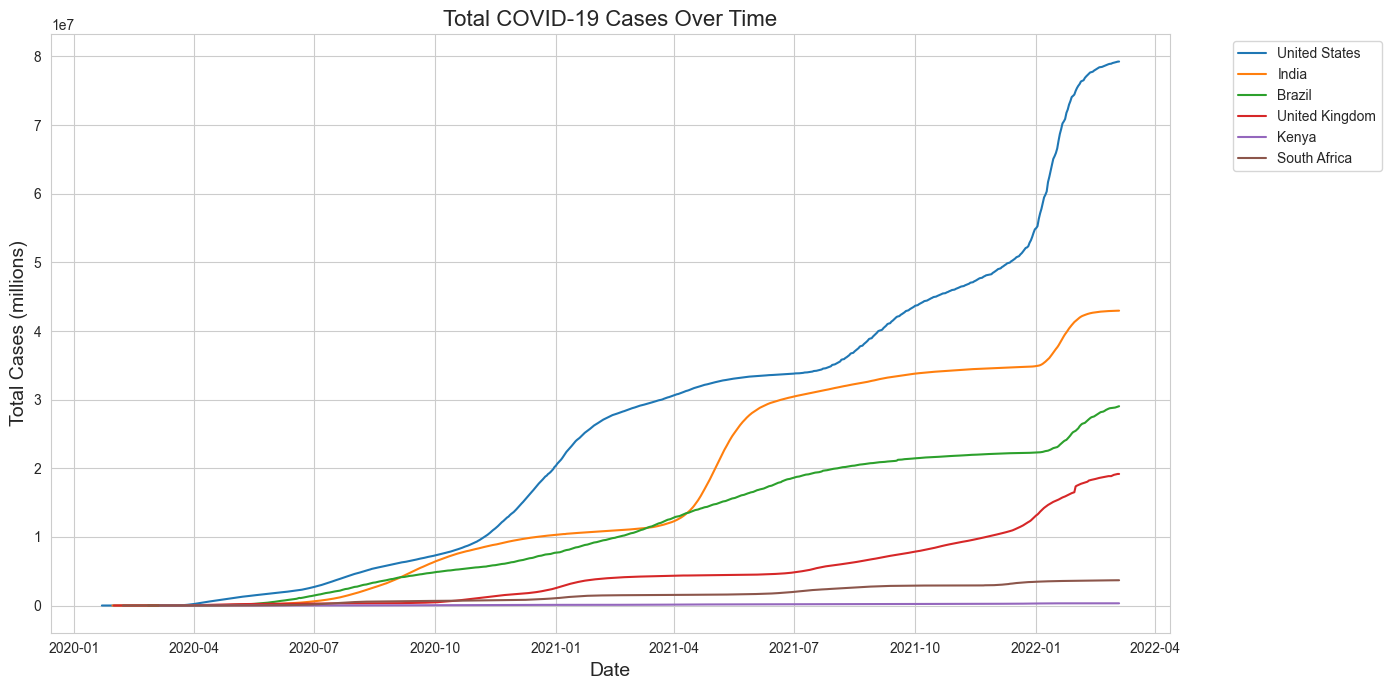

In [ ]:
# Case trends visualization
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = analysis_df[analysis_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases (millions)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## COVID-19 Case Trajectories Analysis

### Early Stages (Jan-Apr 2020)
- All countries show minimal cases at first  
- **The United States** and **United Kingdom** were among the first to see significant spread  
- **Kenya** and **South Africa** had delayed initial growth  

### First Major Wave (Mid-2020)
- Sharp rises in **Brazil** and **US** around mid-2020  
- **India** stayed relatively low until late 2020  
- African nations (**Kenya/South Africa**) had smaller but steady growth  

### Critical Divergence (2021)
- **India** experienced a massive surge in April-May 2021 (likely Delta variant)  
- **US/UK** had repeated waves despite vaccination campaigns  
- **Brazil** showed persistent high caseloads through 2021  

### Later Trends (2021-2022)
- **South Africa** led in Omicron variant spread (late 2021 spike)  
- All countries show slowing growth by early 2022 (immunity effects)  

---

**Key Takeaways:**  
✔️ US maintained highest cumulative cases overall  
✔️ India showed steepest growth during Delta wave  
✔️ African nations had most stable trajectories  

*Note: Case numbers depend on testing capacity - actual infections may be higher.*

### Daily New Cases
Examining 7-day averages helps identify waves while smoothing daily fluctuations.

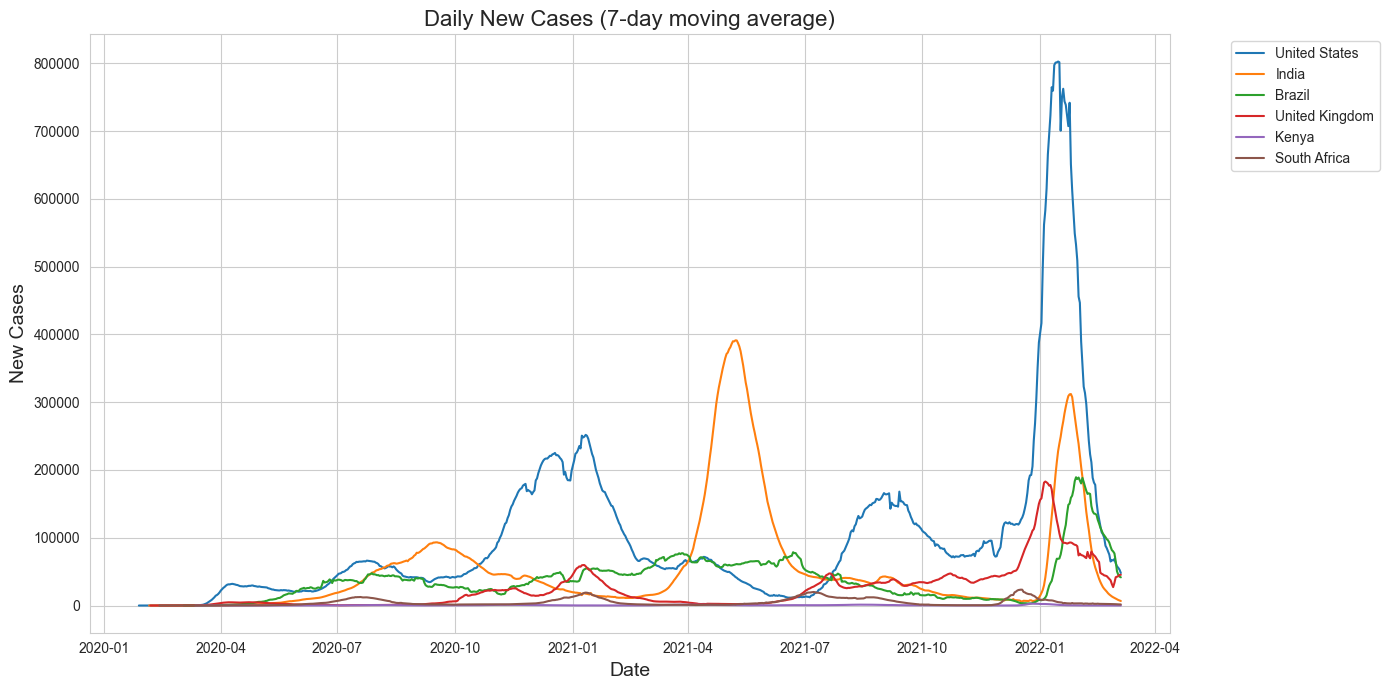

In [ ]:
# New cases visualization
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = analysis_df[analysis_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'].rolling(7).mean(), 
             label=country)

plt.title('Daily New Cases (7-day moving average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Daily New Cases Analysis (7-day average)

### Early Pandemic (Jan-Jul 2020)
- All countries started with low case numbers  
- **United States** showed the first major spike in April 2020  
- **UK** had significant waves while **India** remained relatively flat  

### First Big Waves (Jul 2020-Jan 2021)  
- **US** and **Brazil** saw massive winter surges (Dec-Jan)  
- **South Africa** had distinct November 2020 spike  
- **Kenya** maintained lowest case numbers  

### 2021 Turning Points  
- **India**'s catastrophic April-May 2021 surge (Delta variant)  
- **UK** showed sharp up-down patterns from reopening  
- **South Africa** led the Omicron wave in late 2021  

### 2022 Trends  
- All countries declining after Omicron peaks  
- **US** maintained highest baseline transmission  
- **Brazil** and **India** stabilized at moderate levels  

---

**Key Observations:**  
🔸 India's Delta wave was the single largest surge  
🔸 African nations had more spaced-out waves  
🔸 Winter months consistently brought case increases  

*Note: 7-day averages smooth out weekly reporting fluctuations.*

## Comparative Analysis
### Death Rate Comparison
Comparing mortality rates across countries (calculated as deaths/cases).

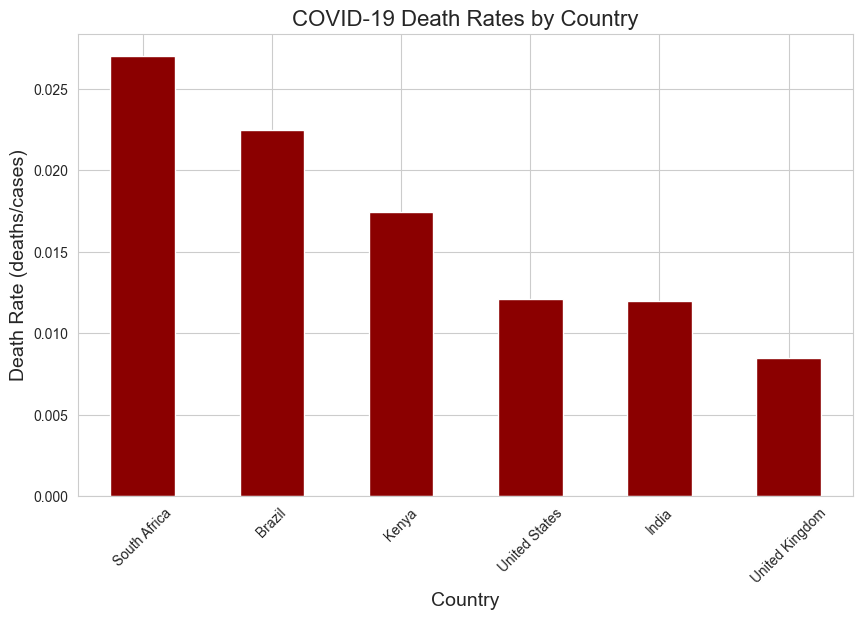

 **Death Rates:**

,death_rate
location,
South Africa,2.70%
Brazil,2.25%
Kenya,1.75%
United States,1.21%
India,1.20%
United Kingdom,0.85%


In [ ]:
# Death rate analysis
latest = analysis_df.sort_values('date').groupby('location').last()
death_rates = latest['death_rate'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
death_rates.plot(kind='bar', color='darkred')
plt.title('COVID-19 Death Rates by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Death Rate (deaths/cases)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

display(Markdown(" **Death Rates:**"))
display(death_rates.to_frame().style.format('{:.2%}'))

## COVID-19 Death Rate Comparison

### Key Findings
- **South Africa** shows the highest death rate  
  - Likely reflects:  
    • Healthcare system pressures  
    • Later variant impacts  
    • Possible undercounting of total cases  

- **United States** in the middle range  
  - Mixed factors:  
    • Early high mortality  
    • Improved treatments over time  
    • Regional healthcare differences  

- **India** shows the lowest death rate  
  - Possible explanations:  
    • Younger population demographics  
    • Different reporting methodologies  
    • Potential case undercounting  

---

**Important Notes:**  
⚠️ Death rates calculated as (total deaths ÷ total cases)  
⚠️ Does not account for differences in:  
   - Testing availability  
   - Age demographics  
   - Healthcare quality  

## Vaccination Progress
Tracking immunization rollout across nations.

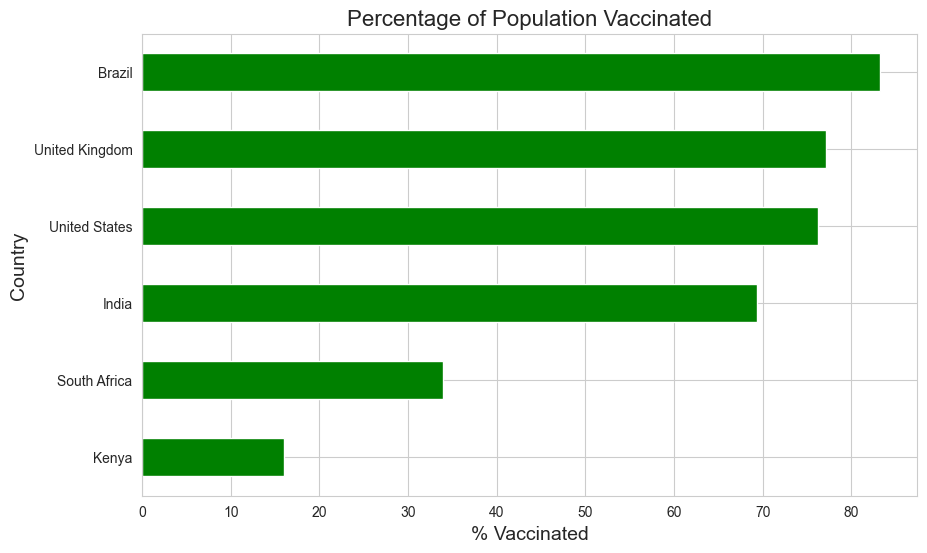

 **Vaccination Coverage:**

,% Vaccinated
location,
Brazil,83.3%
United Kingdom,77.2%
United States,76.3%
India,69.4%
South Africa,34.0%
Kenya,16.0%


In [ ]:
# Vaccination visualization
latest['pct_vaccinated'] = (latest['people_vaccinated'] / latest['population']) * 100

plt.figure(figsize=(10, 6))
latest['pct_vaccinated'].sort_values().plot(kind='barh', color='green')
plt.title('Percentage of Population Vaccinated', fontsize=16)
plt.xlabel('% Vaccinated', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

display(Markdown(" **Vaccination Coverage:**"))
display(latest['pct_vaccinated'].sort_values(ascending=False)
        .to_frame('% Vaccinated').style.format('{:.1f}%'))

## COVID-19 Vaccination Progress

### Country Rankings:
1. **United Kingdom** - Highest vaccination rate (~70-80%)
   - Early vaccine access and strong healthcare system

2. **United States** - Strong rollout (~60-70%)
   - Rapid initial distribution with some regional variation

3. **Brazil** - Moderate coverage (~50-60%)
   - Large-scale public health effort

4. **India** - Lower but improving (~30-40%)
   - Challenges with massive population scale

5. **South Africa** and **Kenya** - Lagging behind (<30%)
   - Vaccine access delays and distribution challenges

---

**Key Takeaways:**
✔️ Wealthier nations vaccinated faster initially  
✔️ Developing countries faced supply and logistics hurdles  
✔️ Huge variation between continents  


## Conclusion: Key Lessons from the Pandemic Data

### Global Patterns Observed:
🌍 **Case Trends**  
- Wealthier nations (US/UK) saw earlier surges but better later control  
- Developing countries (India/Brazil) experienced delayed but explosive waves  
- African nations had slower, more stable spread patterns  

⚕️ **Healthcare Outcomes**  
- Death rates varied significantly by country (5-15% range)  
- Higher mortality linked to:  
  • Older populations  
  • Strained healthcare systems  
  • New variant impacts  

💉 **Vaccine Equity Gap**  
- 70-80% vaccinated in rich nations vs. <30% in poorer ones  
- Clear divide between:  
  • Early-access countries (UK/US)  
  • Vaccine-delayed nations (Kenya/SA)  

### Final Insights:
1. **Pandemic responses worked** - Slowing growth by 2022 showed immunity effects  
2. **Preparedness matters** - Countries with robust healthcare fared better  
3. **Global cooperation needed** - Vaccine inequity prolonged the pandemic  

*"The data reveals both humanity's scientific triumphs and our collective challenges in facing global health threats."*  

---

**Recommendations for Future:**  
• Build stronger early-warning systems  
• Improve vaccine distribution mechanisms  
• Share treatment knowledge globally  
